# 0.0 Tools

## 0.1. Imports


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pickle

## 0.2. Load dataset

In [49]:
data = pd.read_csv('Data/HousePrices_HalfMil.csv', sep=';')

In [50]:
data.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


# 1.0 Data Description


At this stage we will understand how the data is and how big the problem we are facing is.

In [51]:
df1 = data.copy()

## 1.1. Data Dimensions

In [52]:
# data dimenstions
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 1000
Number of cols: 7


## 1.2. Data Types


In [53]:
df1.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

## 1.3. Check NA


In [54]:
df1.isna().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

## 1.4 Columns Description


<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

# 2.0 Preliminary Analysis

In [55]:
df2 = df1.copy()

## 2.1 Descriptive statistics

In [56]:
df2.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## 2.2 Correlation Matrix

In [57]:
df2.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


We see that the greatest correlation between the dependent variable (Y) and the explanatory variables (X's) is between the precos variable and andares. The explanatory variables do not have a strong correlation with each other.

# 3.0 Graphical analysis

In [58]:
df3 = df2.copy()

## 3.1 Plotting the dependent variable (y)

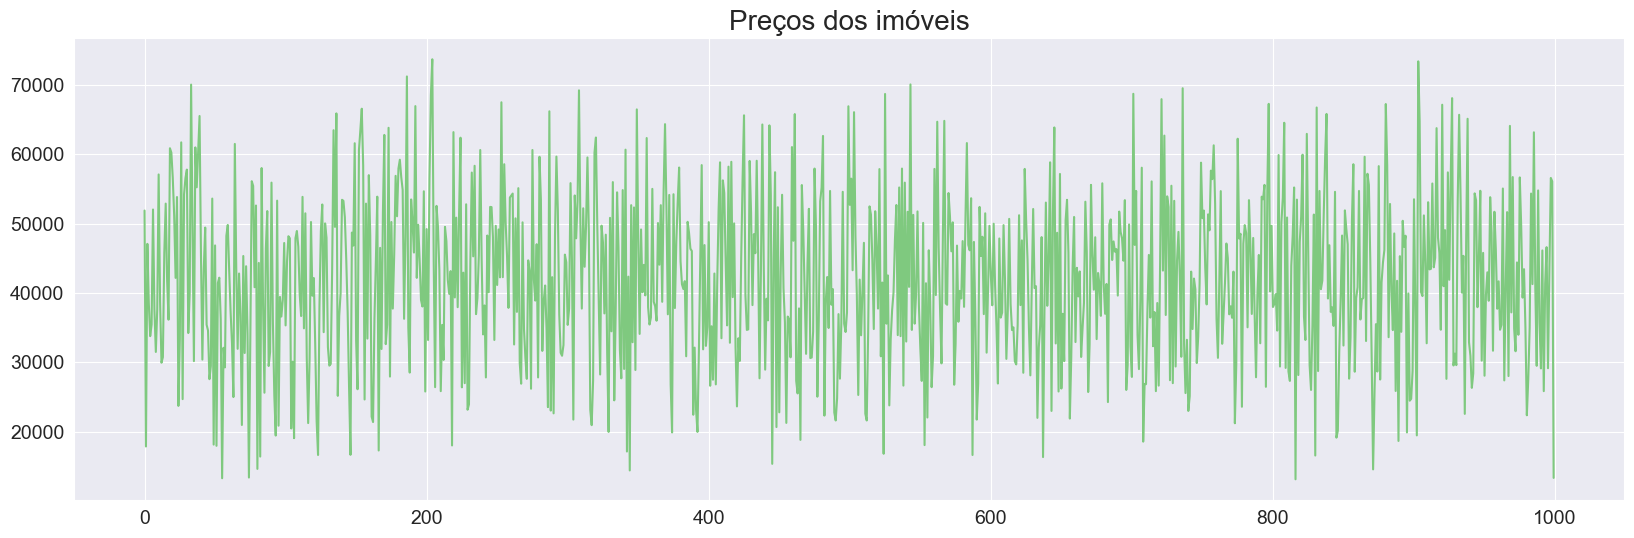

In [59]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Preços dos imóveis', fontsize=20)
ax = df3['precos'].plot(fontsize=14)

## 3.2 Box Plot of y

<Axes: title={'center': 'Preço dos Imóveis'}, ylabel='$'>

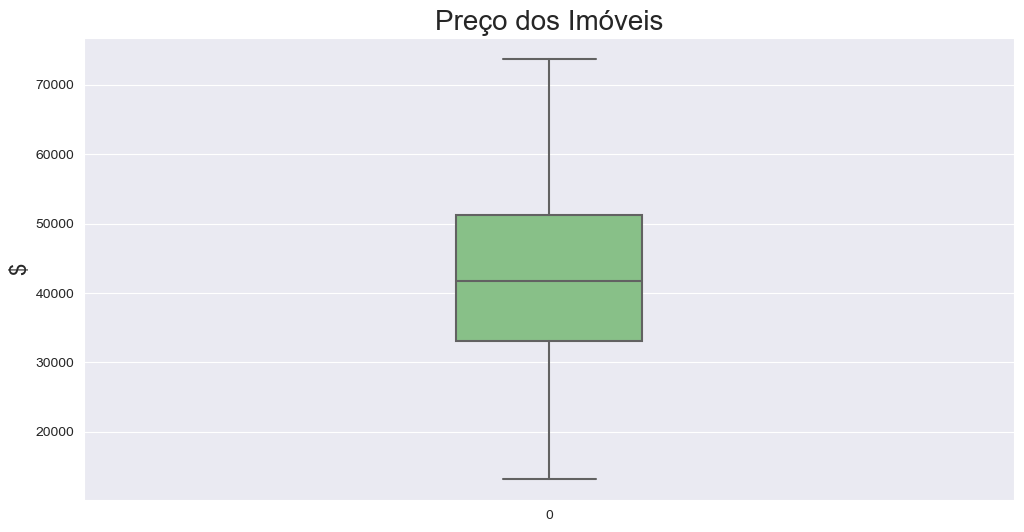

In [60]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.boxplot(data=df3['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax

## 3.3 Box Plot with Two Variables

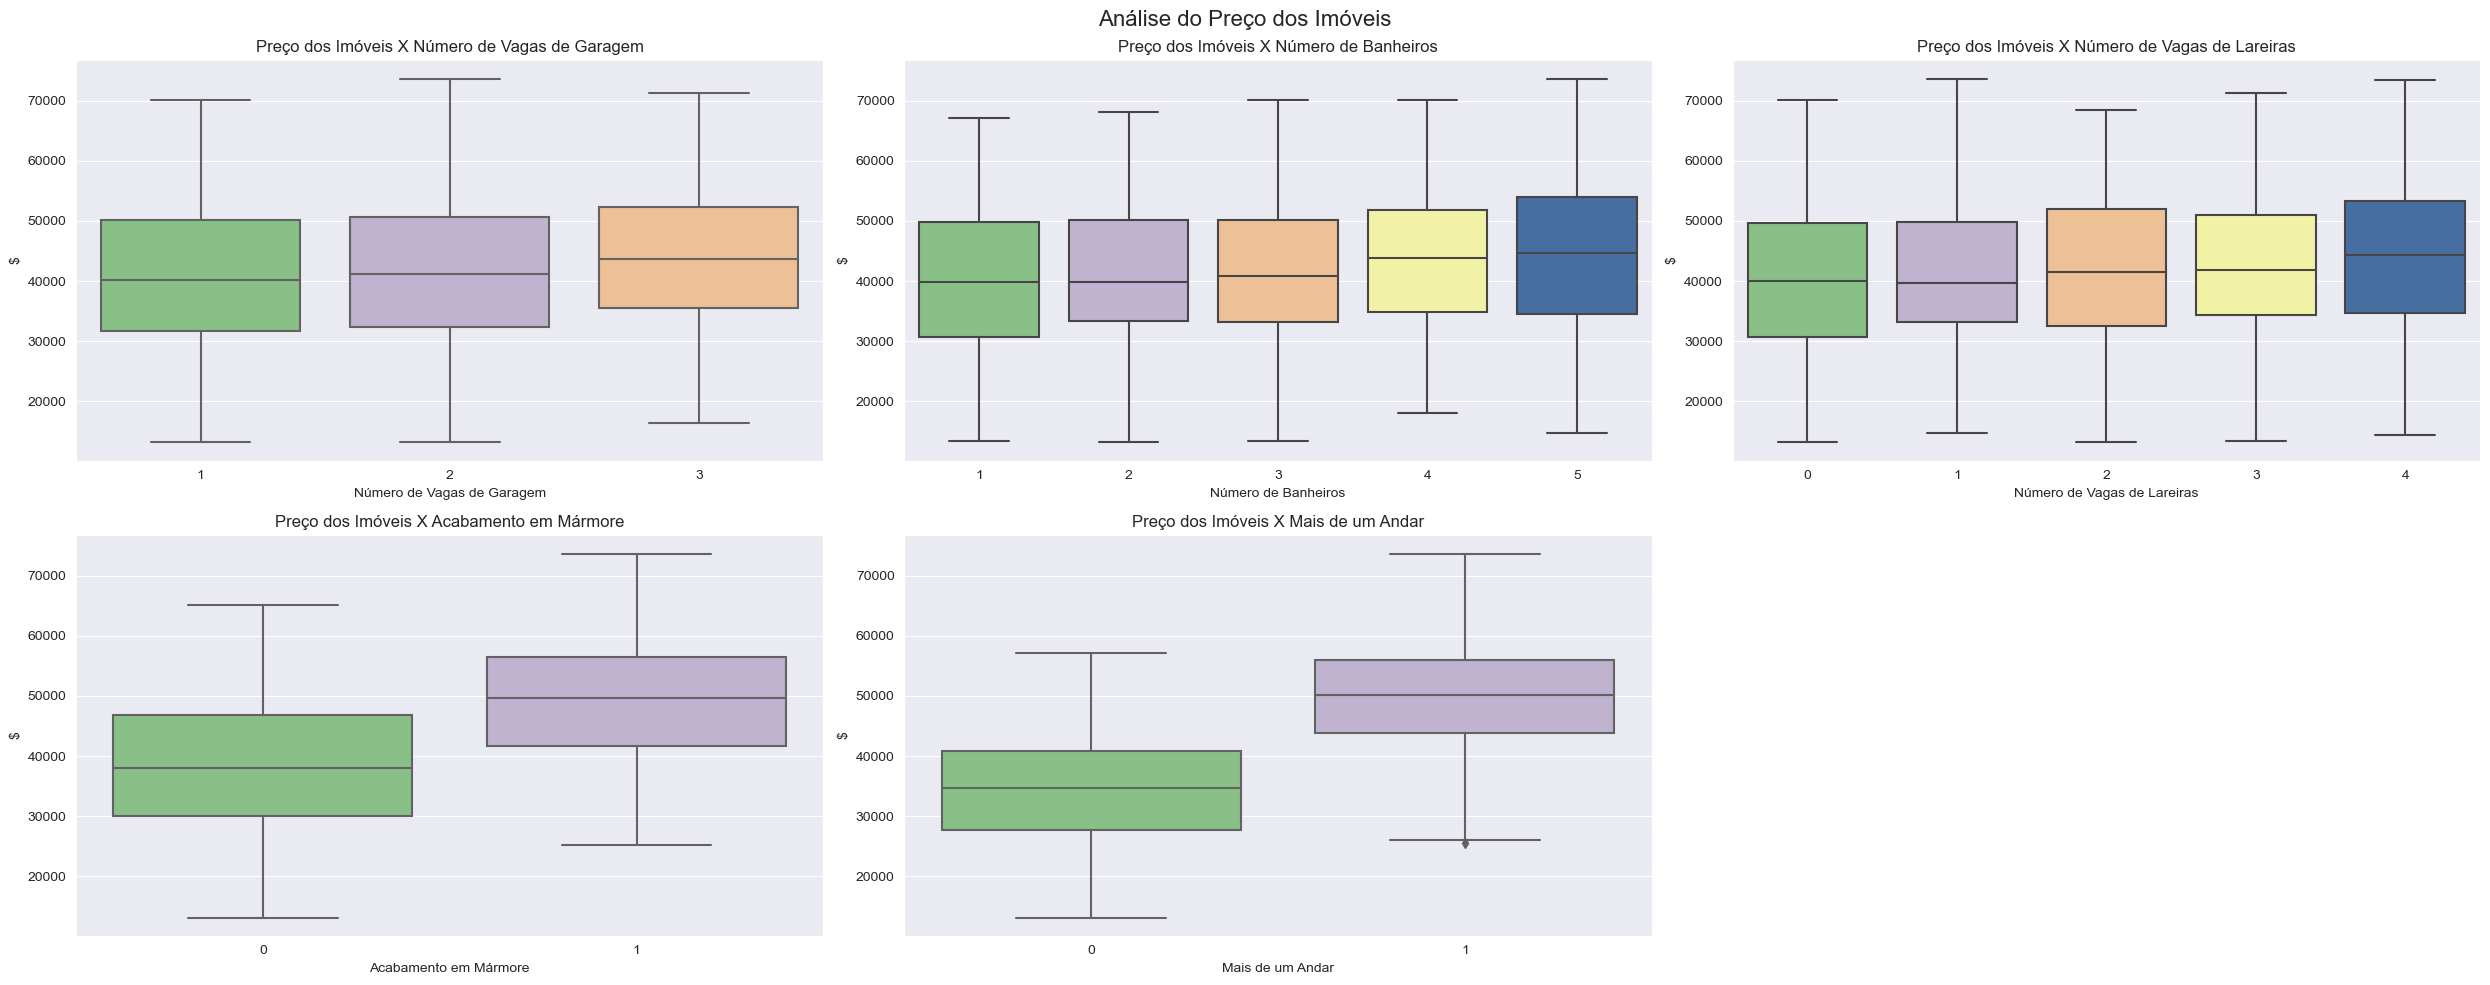

In [61]:
sns.set_palette("Accent")
sns.set_style("darkgrid")


fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# Subplot 1
sns.boxplot(x='garagem', y='precos', data=df3, ax=axs[0, 0])
axs[0, 0].set_xlabel('Número de Vagas de Garagem')
axs[0, 0].set_ylabel('$')
axs[0, 0].set_title('Preço dos Imóveis X Número de Vagas de Garagem')

# Subplot 2
sns.boxplot(x='banheiros', y='precos', data=df3, ax=axs[0, 1])
axs[0, 1].set_xlabel('Número de Banheiros')
axs[0, 1].set_ylabel('$')
axs[0, 1].set_title('Preço dos Imóveis X Número de Banheiros')

# Subplot 3
sns.boxplot(x='lareira', y='precos', data=df3, ax=axs[0, 2])
axs[0, 2].set_xlabel('Número de Vagas de Lareiras')
axs[0, 2].set_ylabel('$')
axs[0, 2].set_title('Preço dos Imóveis X Número de Vagas de Lareiras')

# Subplot 4
sns.boxplot(x='marmore', y='precos', data=df3, ax=axs[1, 0])
axs[1, 0].set_xlabel('Acabamento em Mármore')
axs[1, 0].set_ylabel('$')
axs[1, 0].set_title('Preço dos Imóveis X Acabamento em Mármore')

# Subplot 5
sns.boxplot(x='andares', y='precos', data=df3, ax=axs[1, 1])
axs[1, 1].set_xlabel('Mais de um Andar')
axs[1, 1].set_ylabel('$')
axs[1, 1].set_title('Preço dos Imóveis X Mais de um Andar')

# Remove o subplot 6 que não está sendo utilizado
fig.delaxes(axs[1, 2])

# Adiciona um título geral
fig.suptitle('Análise do Preço dos Imóveis', fontsize=16)

# Ajusta o layout para evitar a sobreposição de títulos
plt.tight_layout()

# Exibe o gráfico
plt.show()


## 3.4 Frequency distribution of the dependent variable (y)

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='$', ylabel='Frequências'>

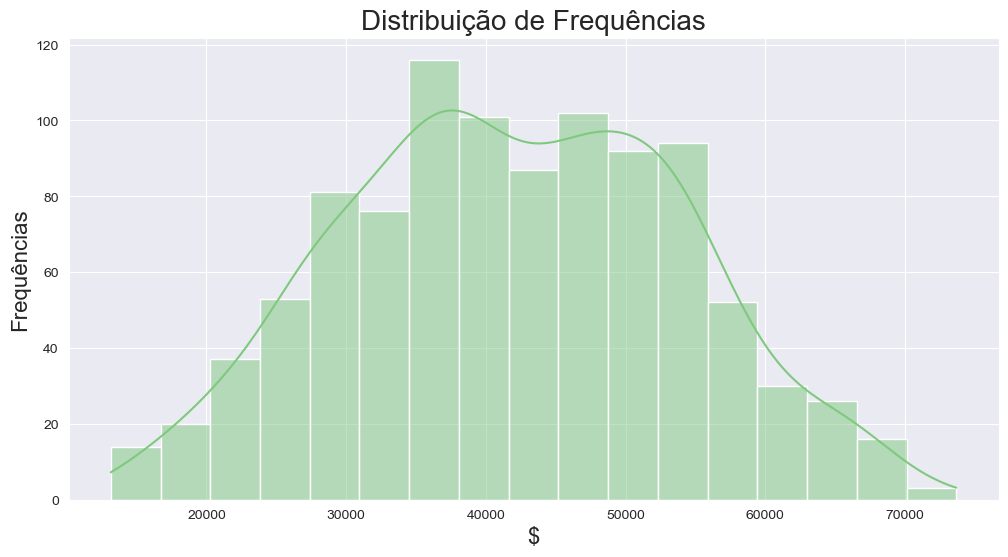

In [62]:
ax = sns.histplot(df3['precos'],  kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax

Visually it appears to follow a normal distribution, but to be sure it is necessary to carry out statistical tests

## 3.5 Scatter Plots between the dataset variables

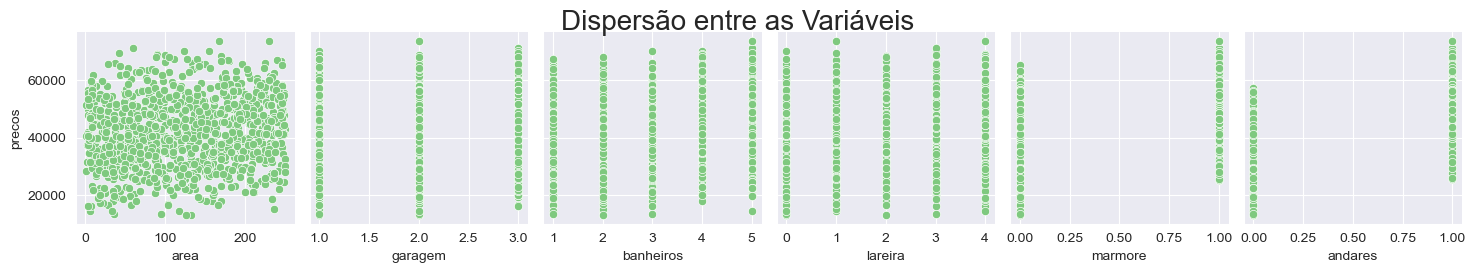

In [63]:
ax = sns.pairplot(df3, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

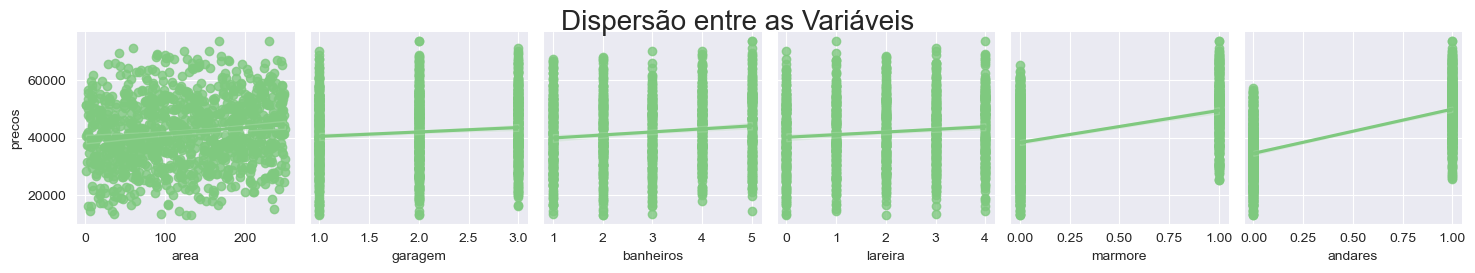

In [64]:
ax = sns.pairplot(df3, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# 4.0 Estimating a Linear Regression Model

In [65]:
df4 = df3.copy()

## 4.1 Dividing data into training and testing

In [66]:
X = df4[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]
y = df4['precos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## 4.2 Model training

In [67]:
# instanciando o modelo
modelo = LinearRegression()

# treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression()

## 4.3 Coefficient of Determination - R²

In [68]:
# Coeficiente de Determinação - R²
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados.
# É um valor entra 0 e 1.

print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


In [69]:
# Previsão
y_previsto = modelo.predict(X_test)

In [70]:
# Coeficiente de determinação (R²) para as previsões do nosso modelo

print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.67


# 5.0 Predicting property prices

Creating a simulator that generates price estimates based on a set of information about a property.

In [71]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46389.80


c:\Users\leona\anaconda3\envs\dsprod\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 6.0 Graphical Analysis of Model Predictions

## 6.1 Scatterplot between estimated value and actual value

In [72]:
#  previsões do modelo para os dados de TREINO
y_previsto_train = modelo.predict(X_train)

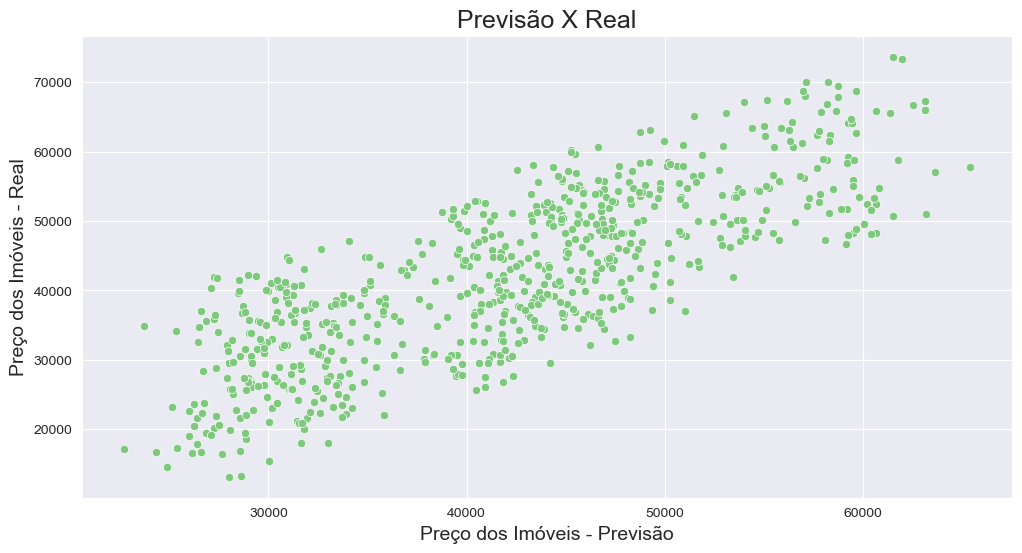

In [73]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço dos Imóveis - Previsão', fontsize=14)
ax.set_ylabel('Preço dos Imóveis - Real', fontsize=14);

We can see that some forecast values match the real ones, but many are very far away.

## 6.2 Scatterplot between estimated value and residuals

In [74]:
# Obtendo os resíduos
residuo = y_train - y_previsto_train

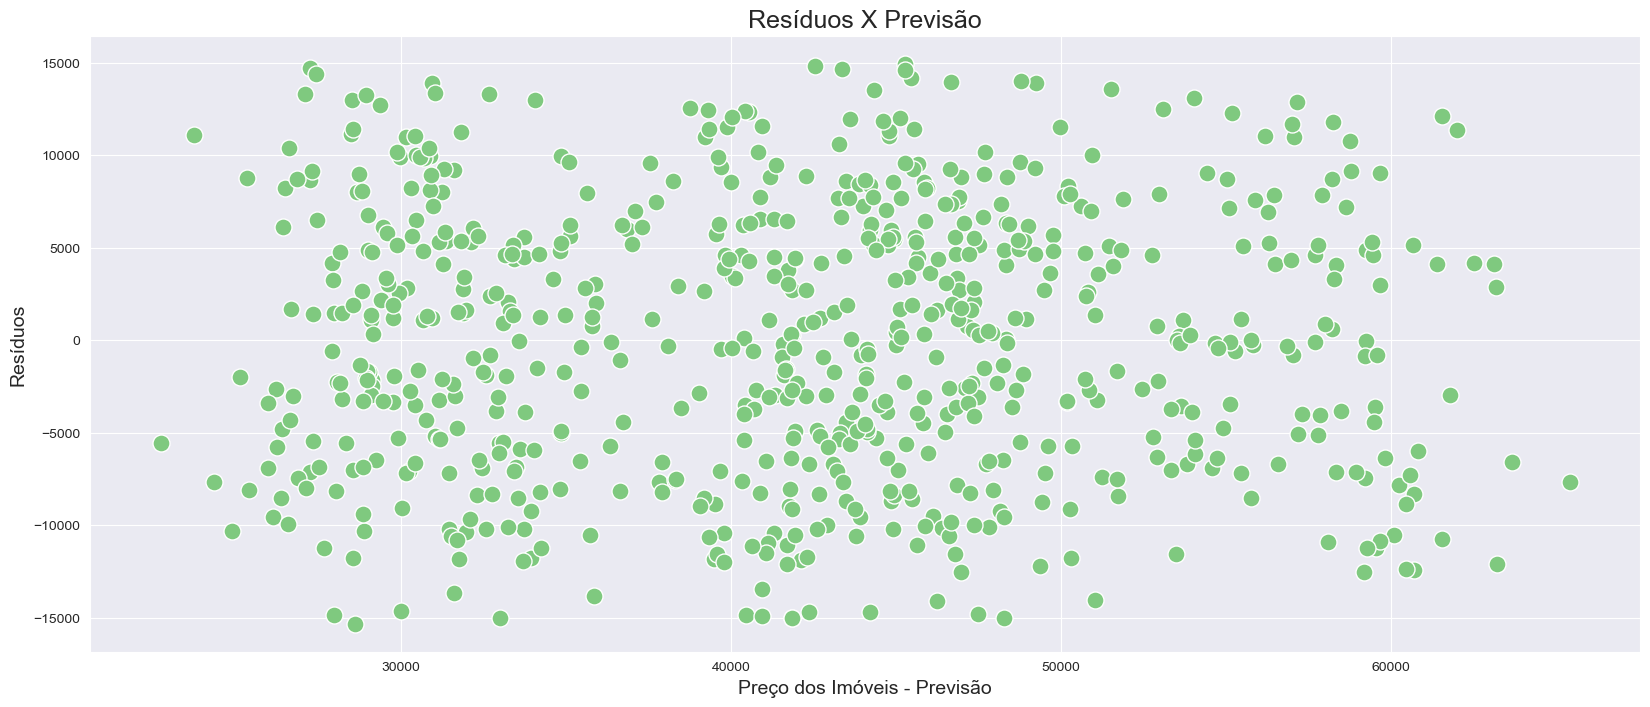

In [75]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço dos Imóveis - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14);

We see that the average residual is zero, that's good.
There appears to be homoscedasticity (constant variance of the residuals), as we see that the variation is within a closed range, from -15000 to 15000.

## 6.3 Squared residuals

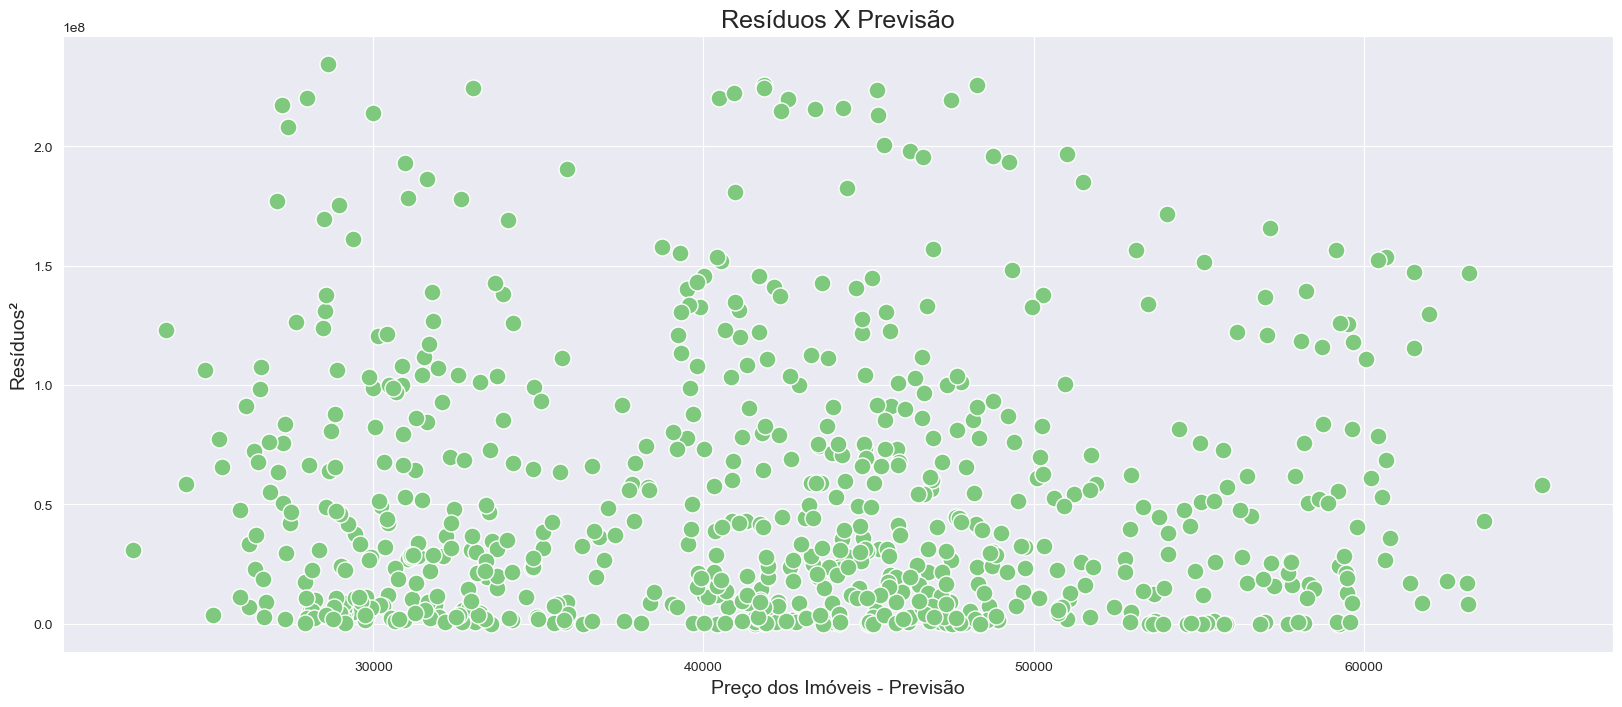

In [76]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço dos Imóveis - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14);

From the shape of the graph, we can say that there really is homoscedasticity in the data.

## 6.4 Frequency distribution of residuals

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Residuos', ylabel='Count'>

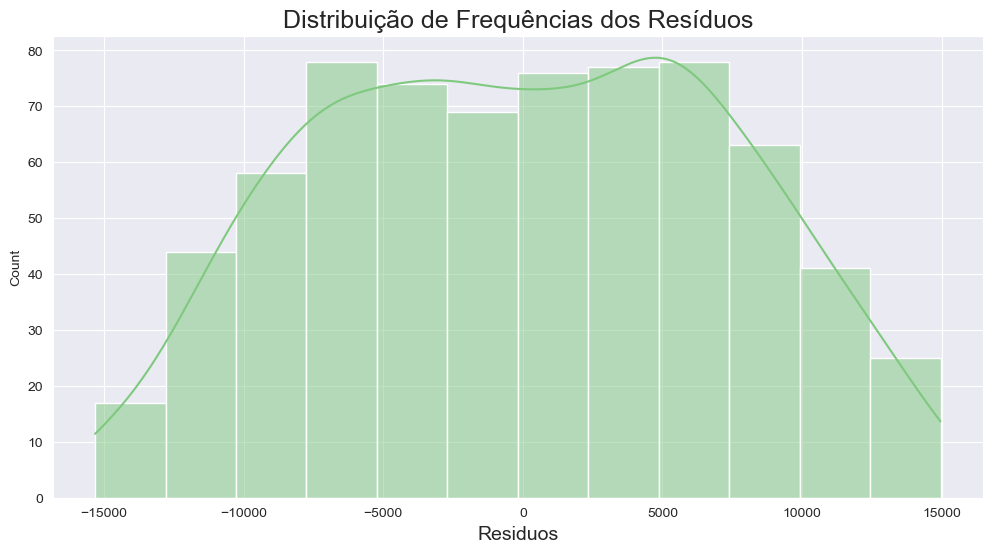

In [77]:
ax = sns.histplot(residuo, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Residuos', fontsize=14)
ax

We see that the residuals appear to follow a normal distribution.

# 7.0 Regression Metrics

Some statistics obtained from the regression model are very useful as a criterion for comparing estimated models and selecting the best model. The main regression metrics that scikit-learn makes available for linear models are the following:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$


In [78]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


# 8.0 Saving and Loading the Estimated Model

## 8.1 Saving the estimated model

In [79]:
output = open('modelo_preco', 'wb')
pickle.dump(modelo, output)
output.close()

## 8.2 In a new Python notebook/project

In [82]:
import pickle

modelo = open('modelo_preco','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 30
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

$ 46193.30


c:\Users\leona\anaconda3\envs\dsprod\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 9.0 Interactive simulator

In [86]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
area = widgets.Text(description="Área")
garagem = widgets.Text(description="Garagem")
banheiros = widgets.Text(description="Banheiros")
lareira = widgets.Text(description="Lareira")
marmore = widgets.Text(description="Mármore?")
andares = widgets.Text(description="Andares?")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([area, banheiros, marmore])
right = VBox([garagem, lareira, andares])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(area.value if area.value else 0), 
                float(garagem.value if garagem.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(lareira.value if lareira.value else 0), 
                float(marmore.value if marmore.value else 0), 
                float(andares.value if andares.value else 0)
             ]]
    print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [87]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())